In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA):( Test data)**

In [2]:
df_test = pd.read_csv('Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# shape of the test data set
df_test.shape

(418, 11)

In [4]:
# full information of the test data set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
# checking the duplicated values in test data set
df_test.duplicated().sum()

np.int64(0)

In [6]:
# drop the unvanted variables
df_test_data = df_test.drop(columns = ['PassengerId','Name','Ticket'],axis = 1)
print(df_test_data)

     Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked
0         3    male  34.5      0      0    7.8292   NaN        Q
1         3  female  47.0      1      0    7.0000   NaN        S
2         2    male  62.0      0      0    9.6875   NaN        Q
3         3    male  27.0      0      0    8.6625   NaN        S
4         3  female  22.0      1      1   12.2875   NaN        S
..      ...     ...   ...    ...    ...       ...   ...      ...
413       3    male   NaN      0      0    8.0500   NaN        S
414       1  female  39.0      0      0  108.9000  C105        C
415       3    male  38.5      0      0    7.2500   NaN        S
416       3    male   NaN      0      0    8.0500   NaN        S
417       3    male   NaN      1      1   22.3583   NaN        C

[418 rows x 8 columns]


In [7]:
# checking the missing values
df_test_data.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


In [8]:
# mean and mode of the missing varables
print(df_test_data['Age'].mean())
print(df_test_data['Cabin'].mode())

30.272590361445783
0    B57 B59 B63 B66
Name: Cabin, dtype: object


In [9]:
df_test_data['Fare'].mean()

np.float64(35.627188489208635)

In [10]:
# fill the missing values with mean and mode
df_test_data['Age'].fillna(value = df_test_data['Age'].mean(),inplace = True)
df_test_data['Fare'].fillna(value = df_test_data['Fare'].mean(),inplace = True)
df_test_data['Cabin'].fillna(value = df_test_data['Cabin'].mode().iloc[0],inplace = True)

In [11]:
# describe the data test
df_test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


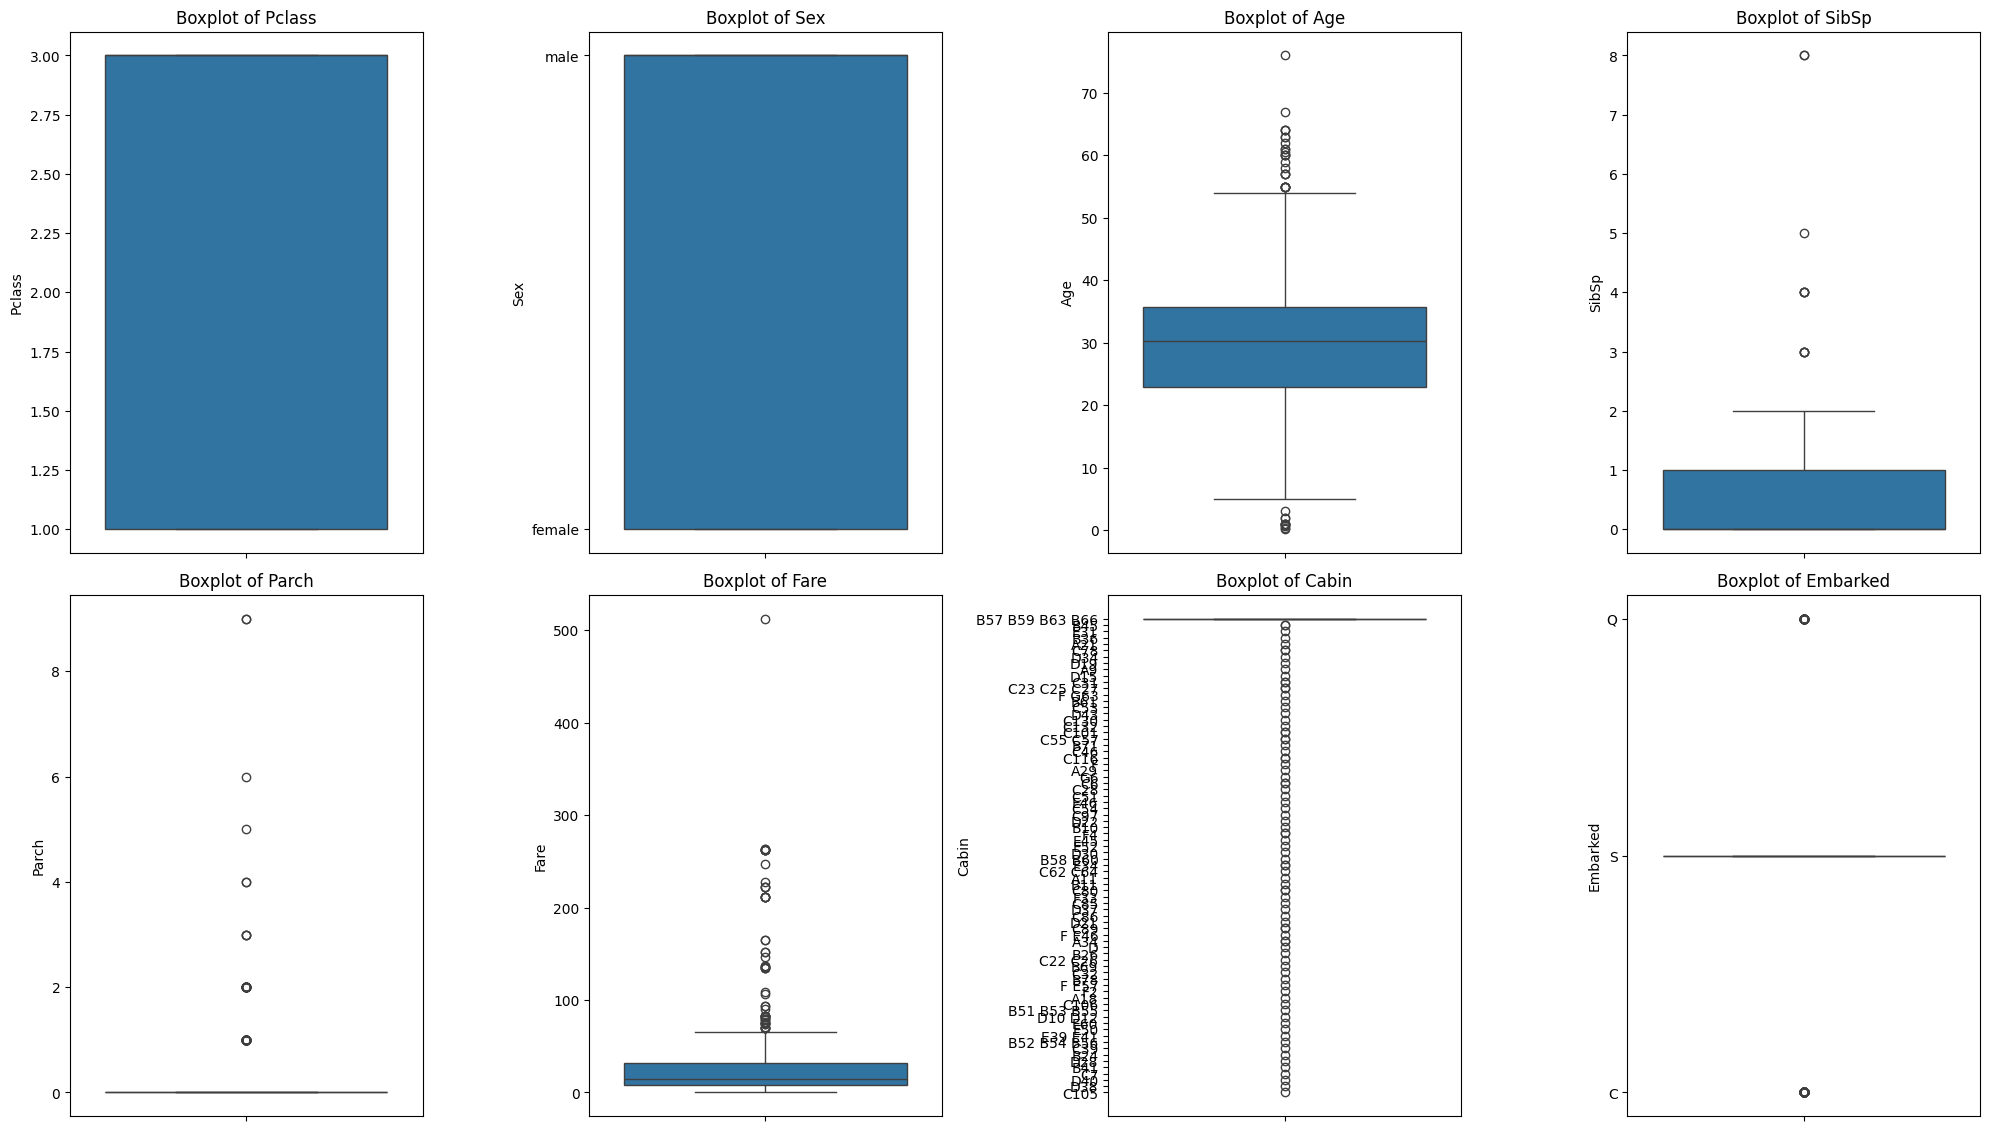

In [12]:
# creat a boxplot to identify the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_test_data.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df_test_data[column],vert=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

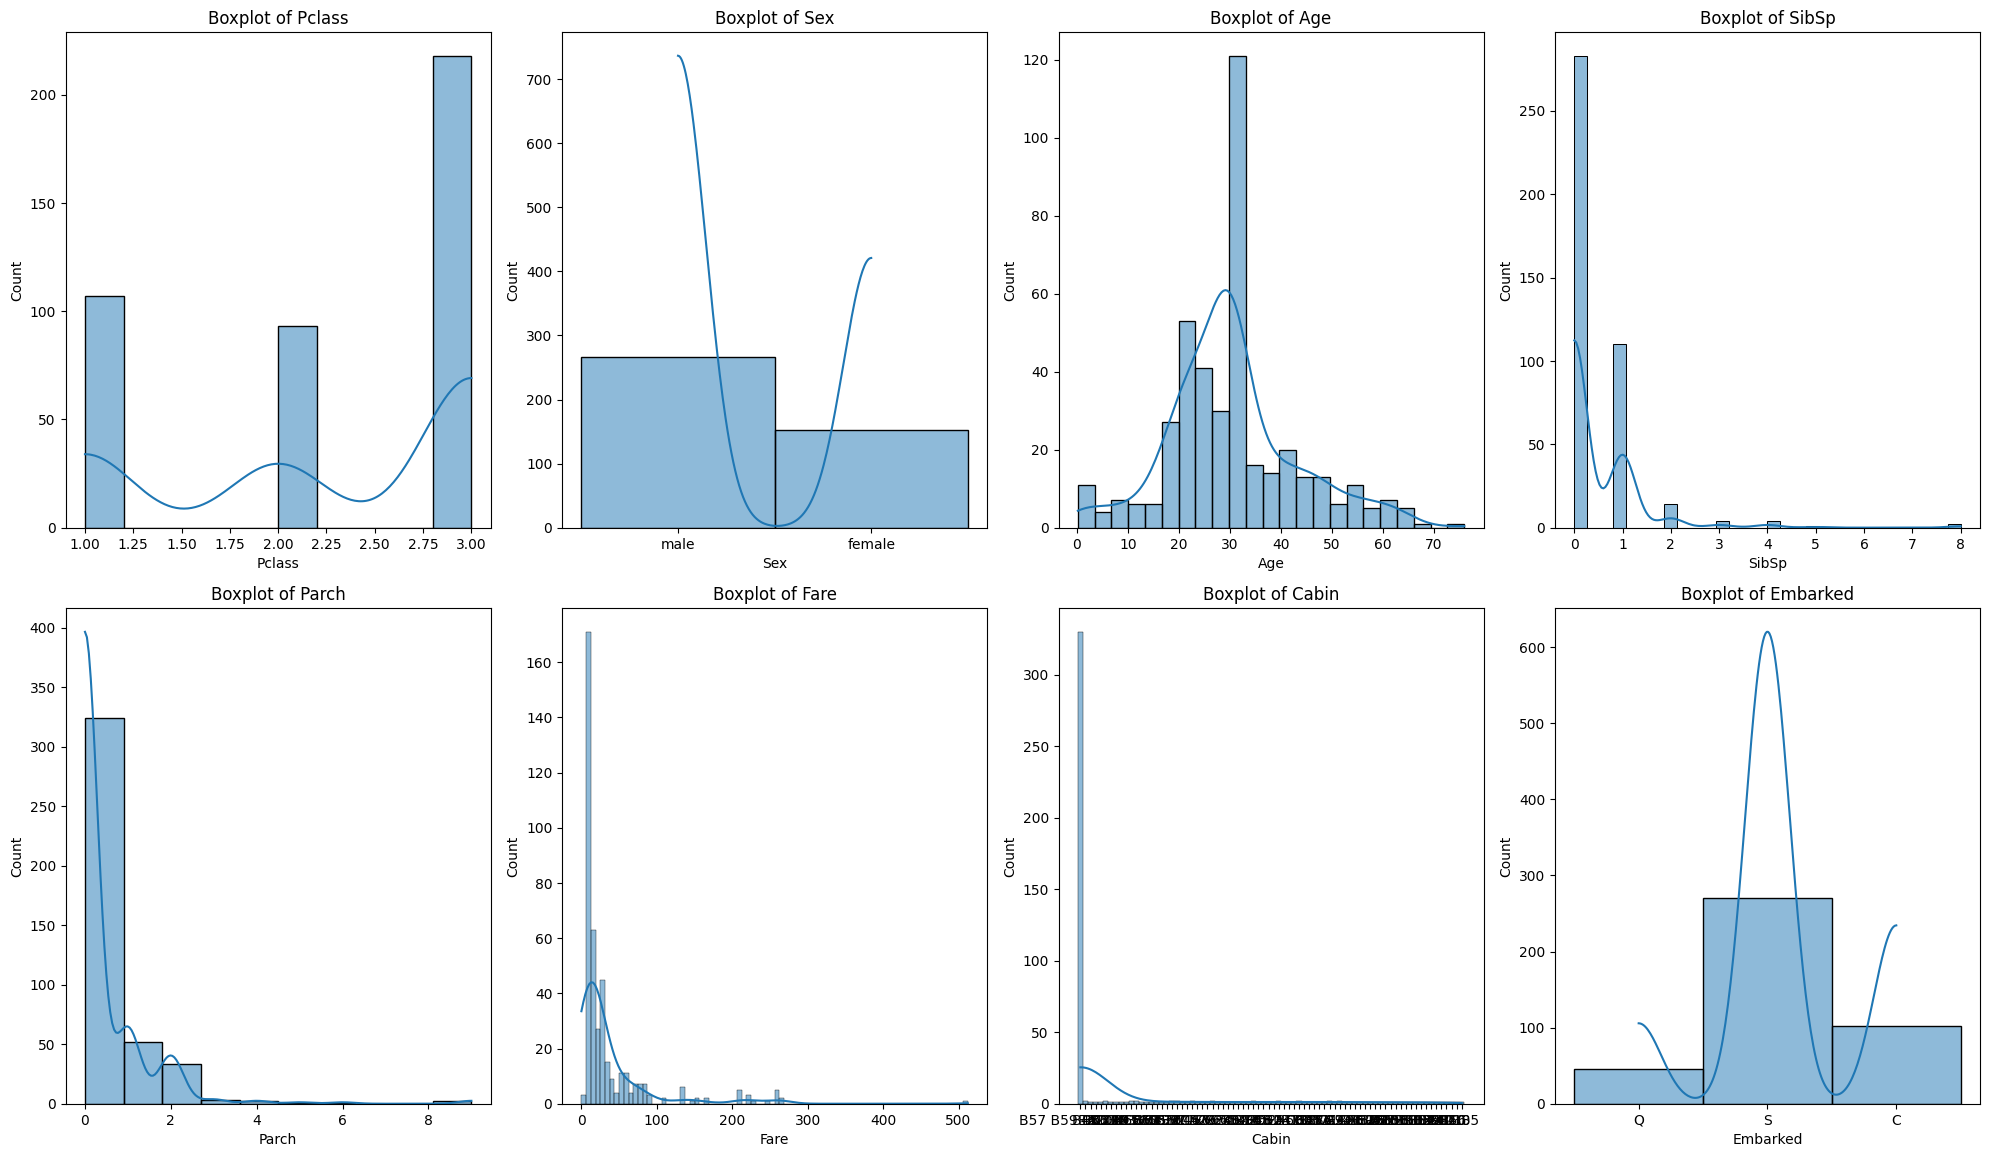

In [13]:
# creat a histogram to identify the skewness
plt.figure(figsize = (20,17))
for i,column in enumerate(df_test_data.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df_test_data[column],kde=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

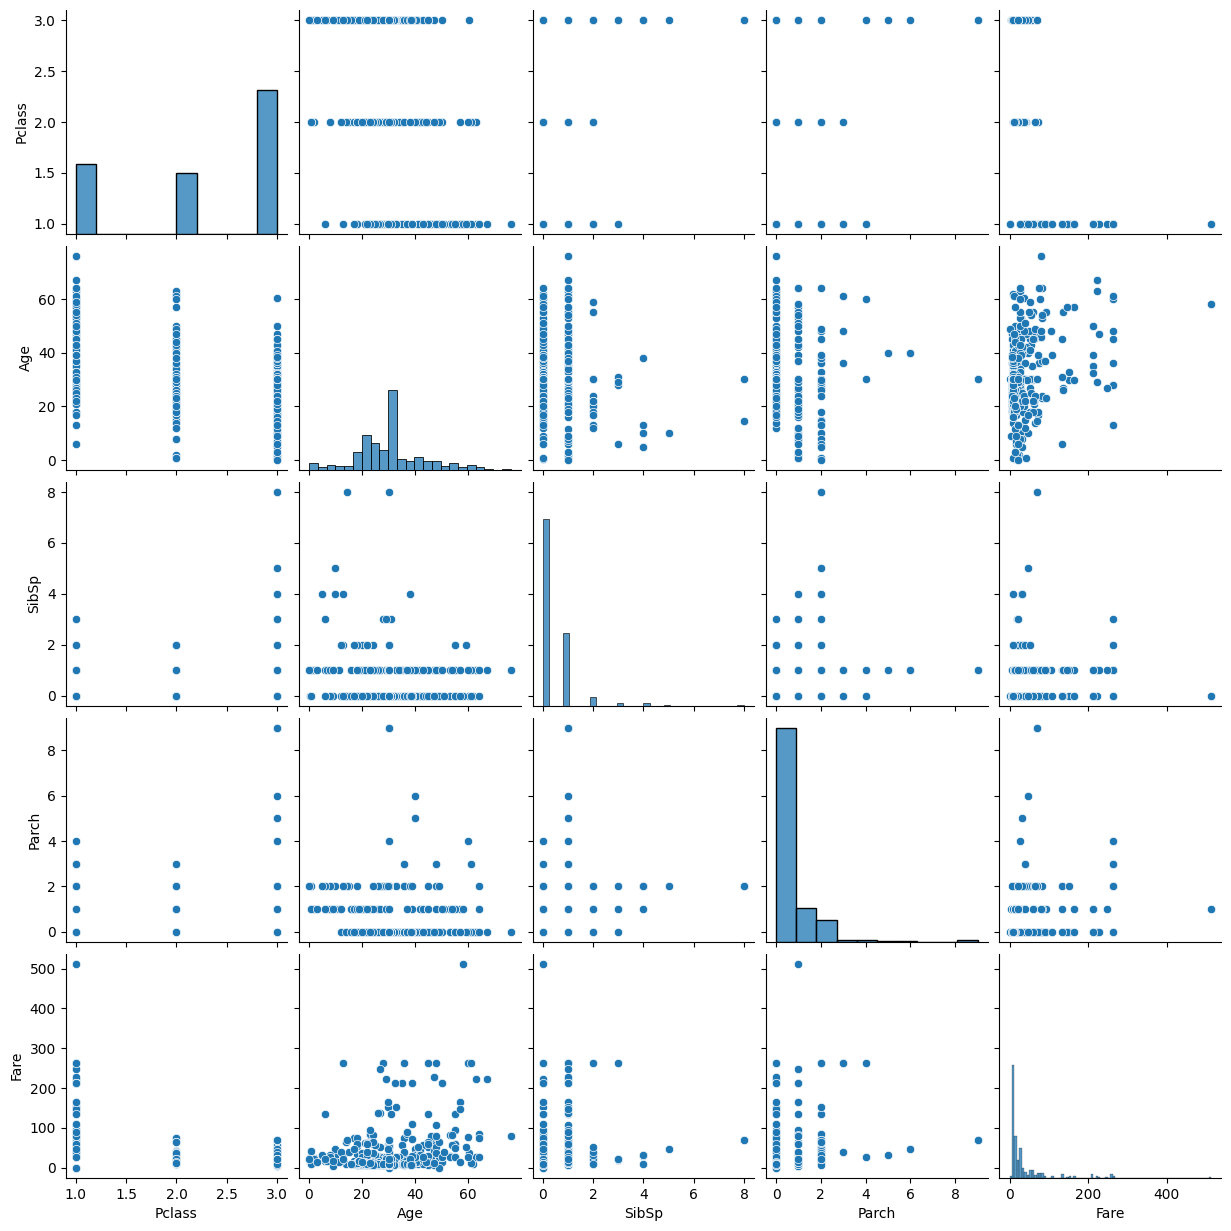

In [14]:
# creat a pair plot
sns.pairplot(df_test_data)
plt.show()

# **Data Preprocessing**

In [15]:
# LabelEncoding the data
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (list, not DataFrame)
object_cols = ['Sex','Cabin','Embarked']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in object_cols:
    df_test_data[col] = le.fit_transform(df_test_data[col].astype(str))  # Convert to string if needed

df_test_data  # Display

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,15,1
1,3,0,47.00000,1,0,7.0000,15,2
2,2,1,62.00000,0,0,9.6875,15,1
3,3,1,27.00000,0,0,8.6625,15,2
4,3,0,22.00000,1,1,12.2875,15,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,15,2
414,1,0,39.00000,0,0,108.9000,22,0
415,3,1,38.50000,0,0,7.2500,15,2
416,3,1,30.27259,0,0,8.0500,15,2


In [16]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]
numeric = df_test_data[numeric_cols]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df_test_data[numeric_cols] = scaler.fit_transform(df_test_data[numeric_cols])

df_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1,0.452723,0.000,0.000000,0.015282,15,1
1,1.0,0,0.617566,0.125,0.000000,0.013663,15,2
2,0.5,1,0.815377,0.000,0.000000,0.018909,15,1
3,1.0,1,0.353818,0.000,0.000000,0.016908,15,2
4,1.0,0,0.287881,0.125,0.111111,0.023984,15,2


In [17]:
# Remove the outliers and replace with meadian

def remove_outliers_replace_with_median(df_test_data):
    for column in df_test_data.select_dtypes(include=[np.number]).columns:
        Q1 = df_test_data[column].quantile(0.25)
        Q3 = df_test_data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        median = df_test_data[column].median()
        df_test_data[column] = df_test_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_test_data
df_clean_data = remove_outliers_replace_with_median(df_test_data)
df_clean_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1,0.452723,0.000,0.0,0.015282,15.0,1
1,1.0,0,0.617566,0.125,0.0,0.013663,15.0,2
2,0.5,1,0.396975,0.000,0.0,0.018909,15.0,1
3,1.0,1,0.353818,0.000,0.0,0.016908,15.0,2
4,1.0,0,0.287881,0.125,0.0,0.023984,15.0,2
...,...,...,...,...,...,...,...,...
413,1.0,1,0.396975,0.000,0.0,0.015713,15.0,2
414,0.0,0,0.512066,0.000,0.0,0.028213,15.0,0
415,1.0,1,0.505473,0.000,0.0,0.014151,15.0,2
416,1.0,1,0.396975,0.000,0.0,0.015713,15.0,2


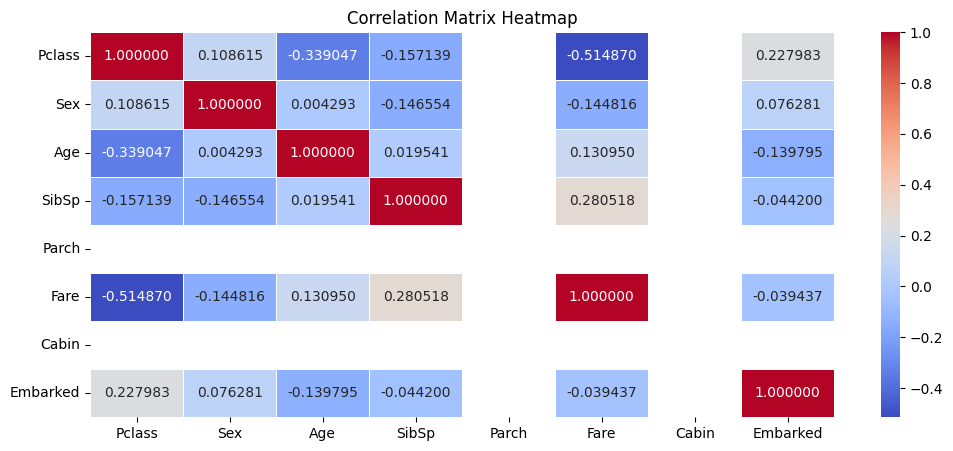

In [18]:
# heat map of the test data set
plt.figure(figsize = (12,5))
sns.heatmap(df_clean_data.corr(),annot = True, cmap = 'coolwarm',fmt = '2f',linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **training data**

In [19]:
# import the train data
df_train = pd.read_csv('Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
# drop the variables
df_train_data = df_train.drop(columns = ['PassengerId','Name','Ticket'],axis = 1)
df_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [22]:
# checking the duplicated values
df_train_data.duplicated().sum()

np.int64(107)

In [23]:
# drop the duplicates values in the train data set
df_train_data.drop_duplicates(inplace =True)

In [24]:
# checking the missing values
df_train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,106
SibSp,0
Parch,0
Fare,0
Cabin,581
Embarked,2


In [25]:
# checking the mean and mode
print(df_train_data['Age'].mean())
print(df_train_data['Cabin'].mode())
print(df_train_data['Embarked'].mode())

29.869351032448375
0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object
0    S
Name: Embarked, dtype: object


In [26]:
# fill the null values with mean and mode values
df_train_data['Age'].fillna(value = df_train_data['Age'].mean(),inplace = True)
df_train_data['Cabin'].fillna(value = df_train_data['Cabin'].mode().iloc[0],inplace = True)
df_train_data['Embarked'].fillna(value = df_train_data['Embarked'].mode().iloc[0],inplace = True)
df_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,B96 B98,Q
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.869351,1,2,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [27]:
# describe the train data set
df_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,13.723745,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.869351,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


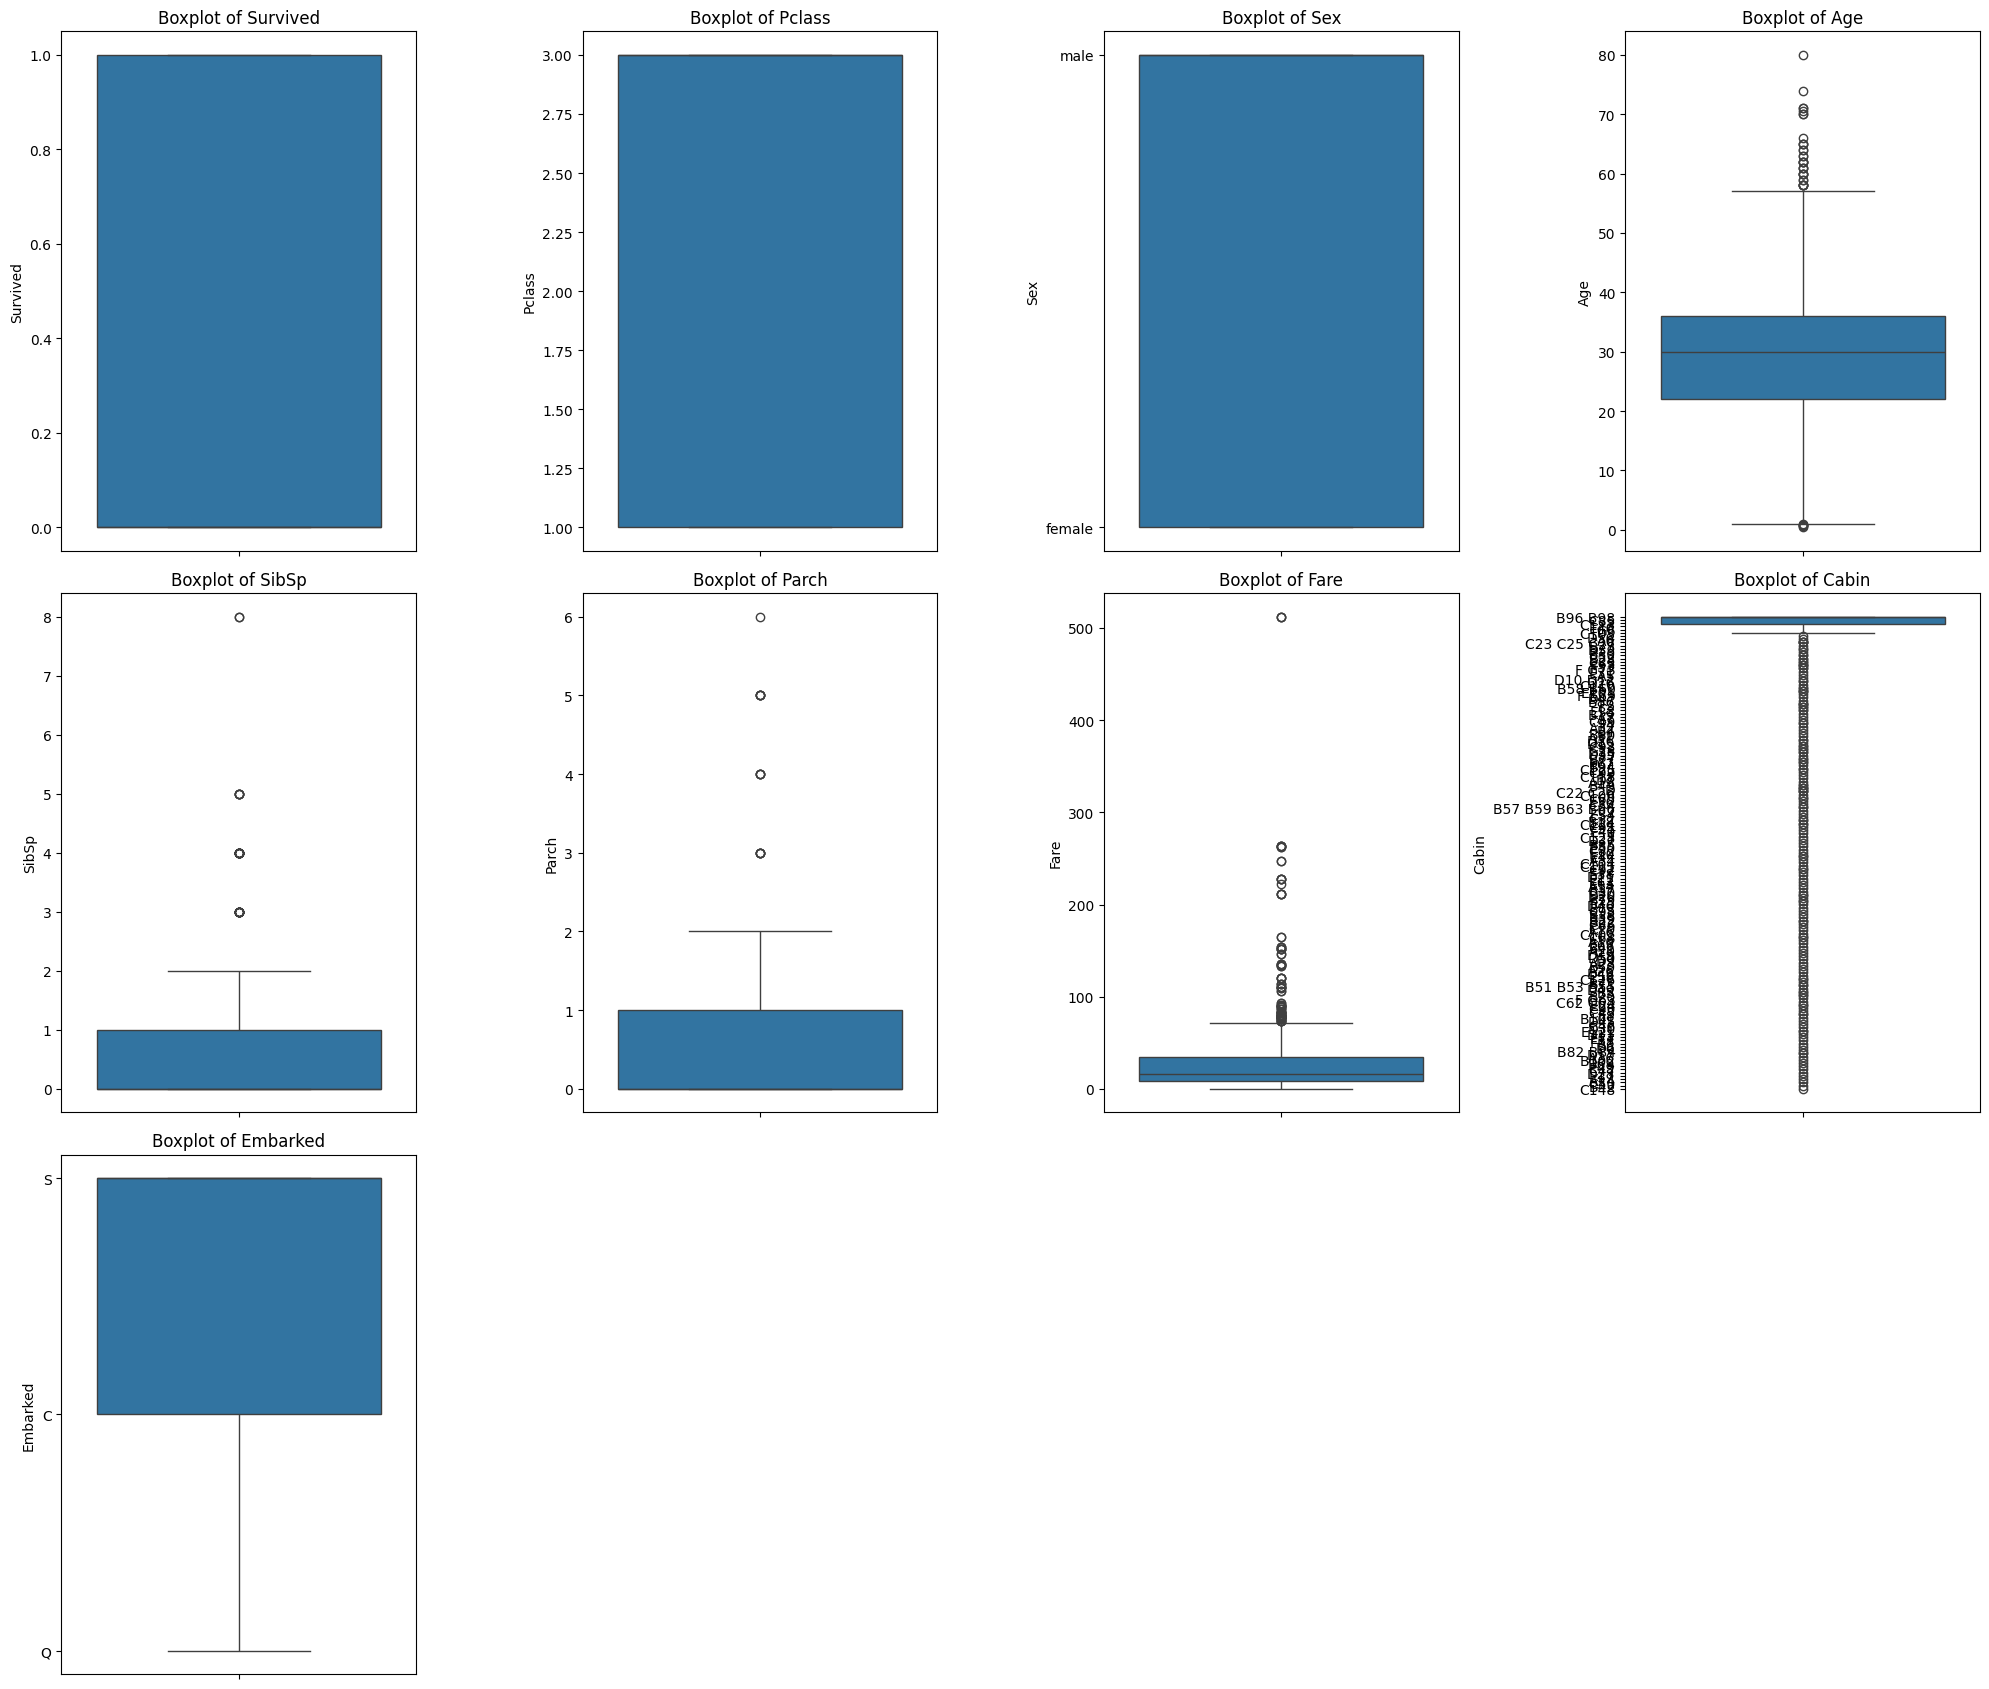

In [28]:
# creat a boxplot to identify the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_train_data.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df_train_data[column],vert=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

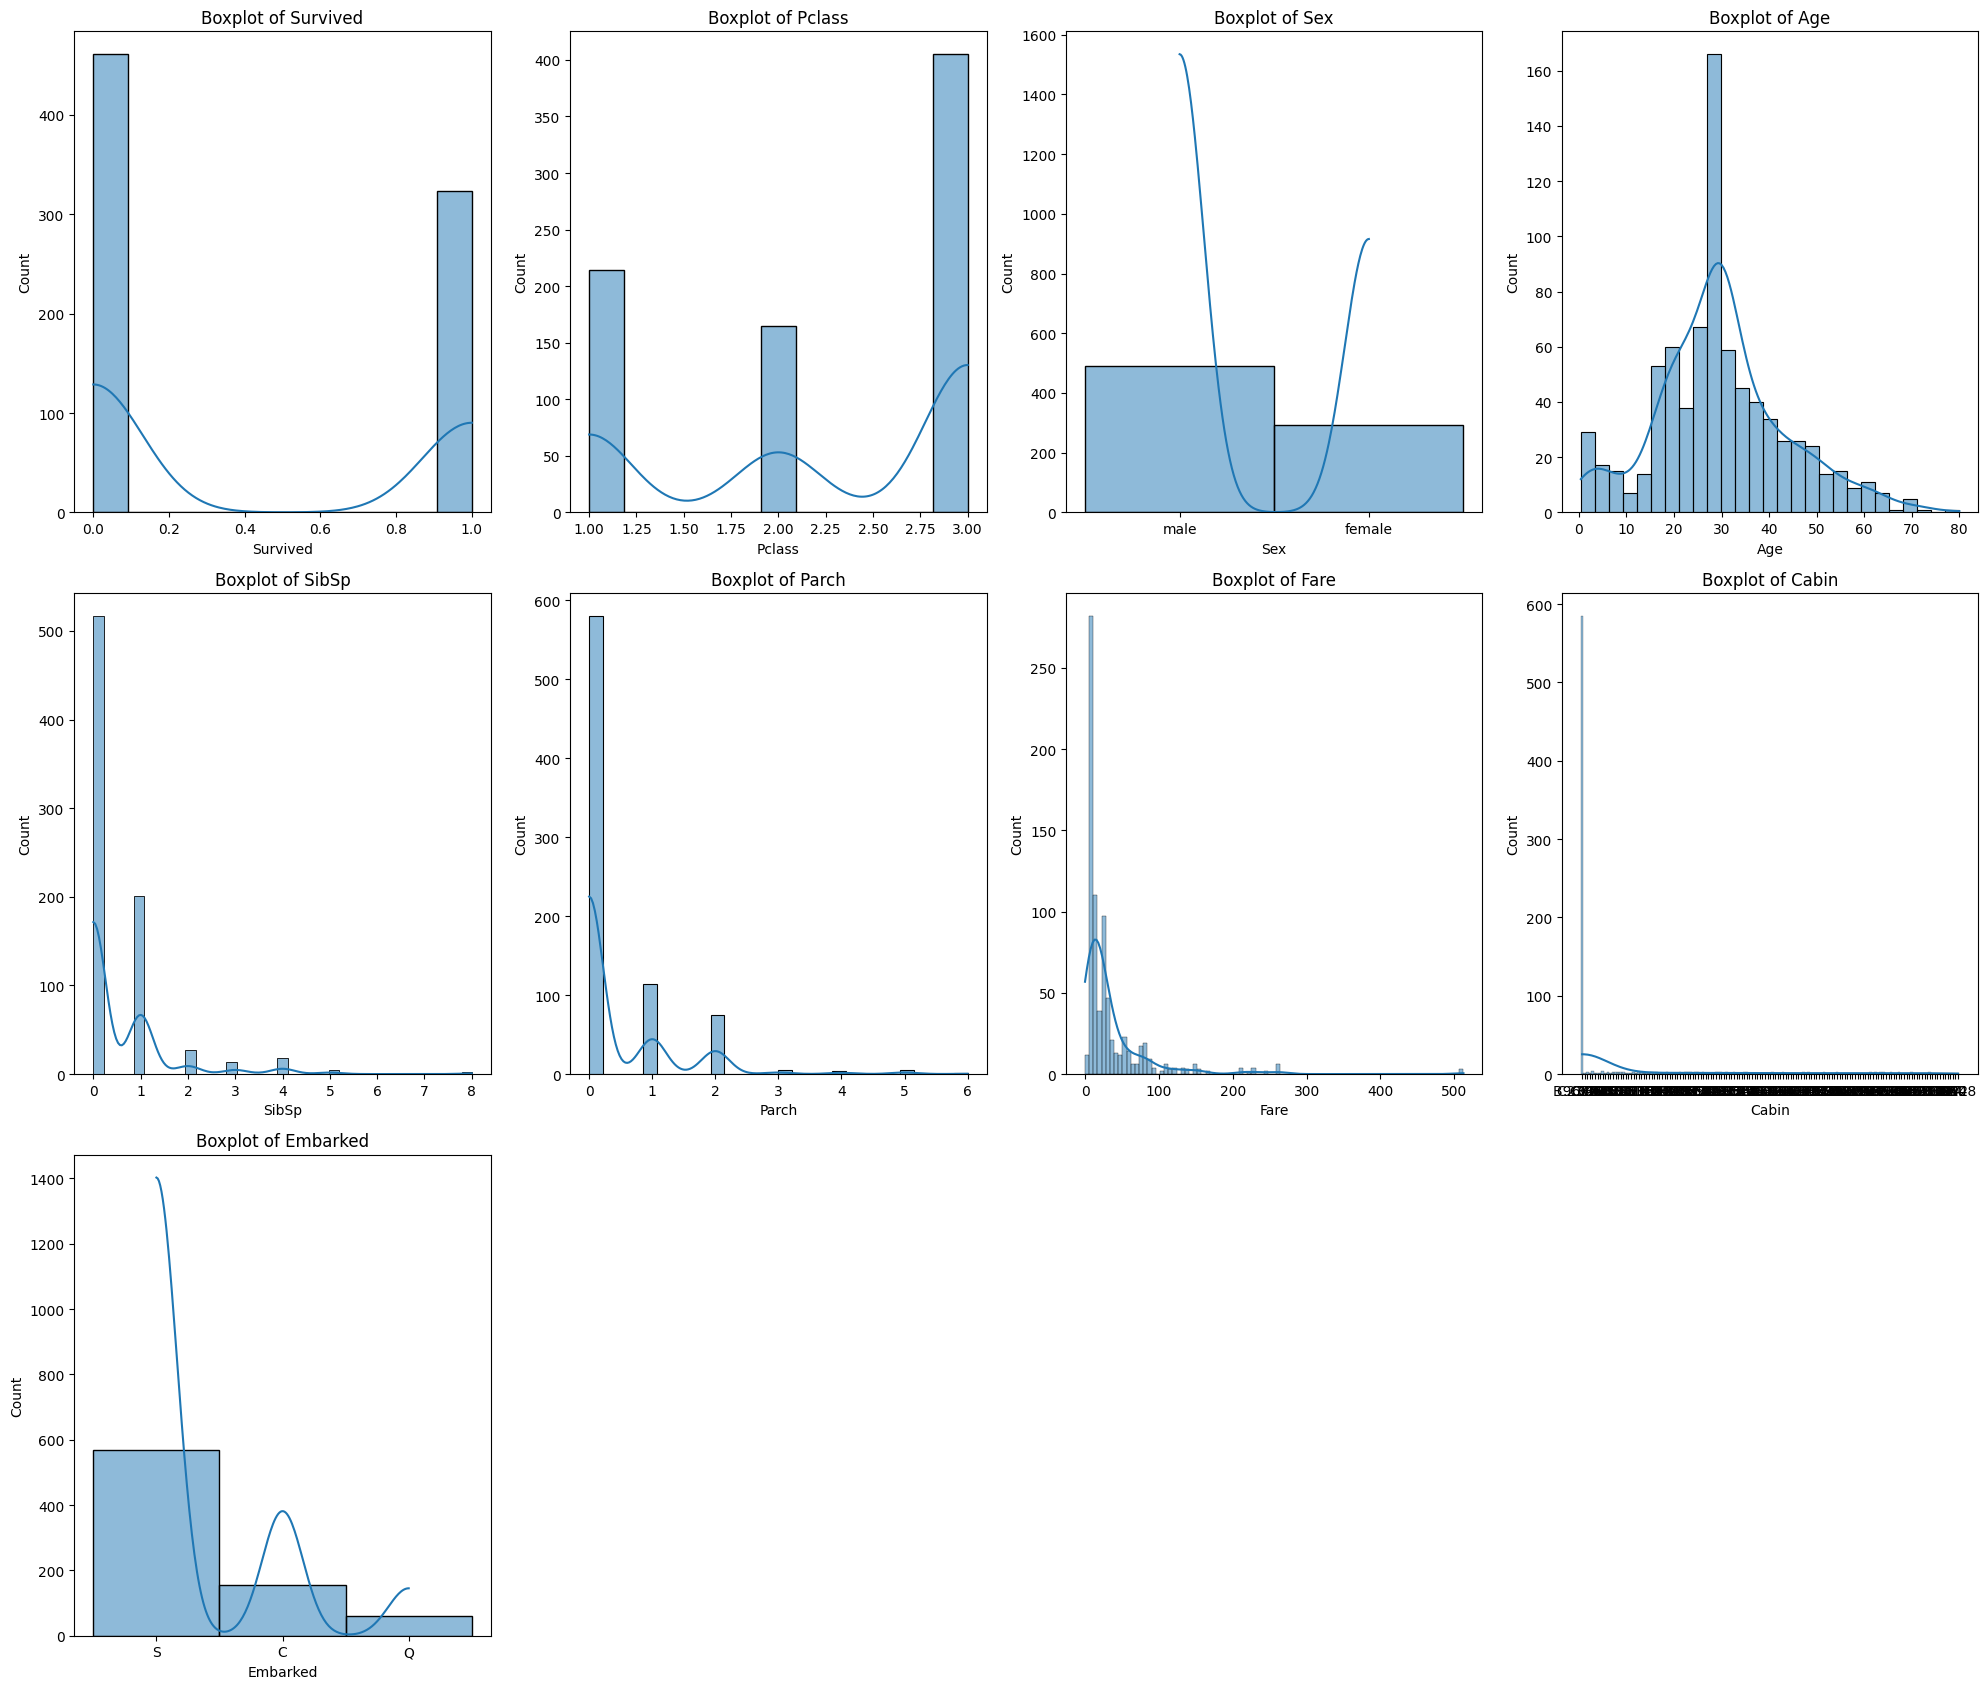

In [29]:
# creat a Histogram

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_train_data.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df_train_data[column],kde=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

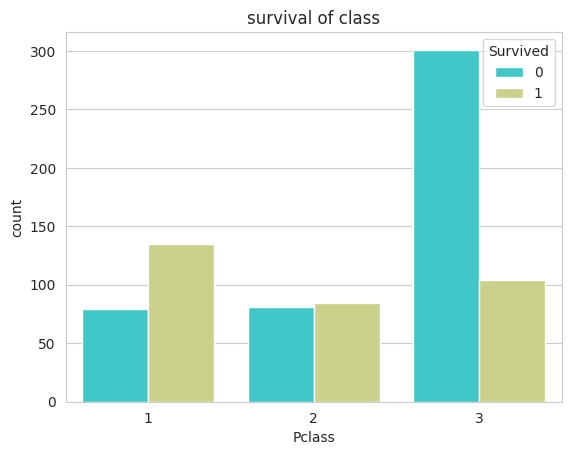

In [30]:
# visualize the gender num variables

sns.set_style('whitegrid')
sns.countplot(x = 'Pclass',hue = 'Survived', data = df_train_data, palette = 'rainbow')
plt.title('survival of class')
plt.show()

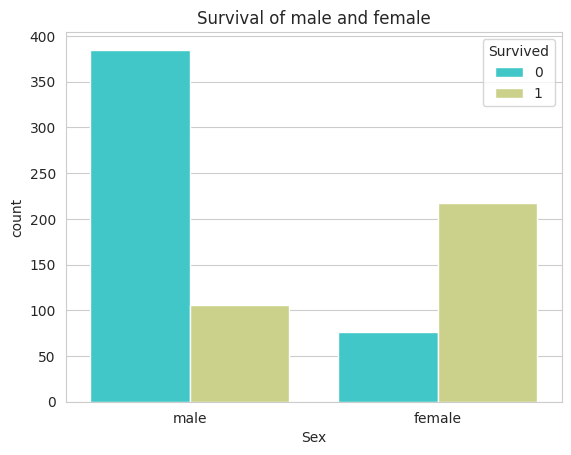

In [31]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue = 'Survived',data = df_train_data, palette = 'rainbow')
plt.title('Survival of male and female')
plt.show()

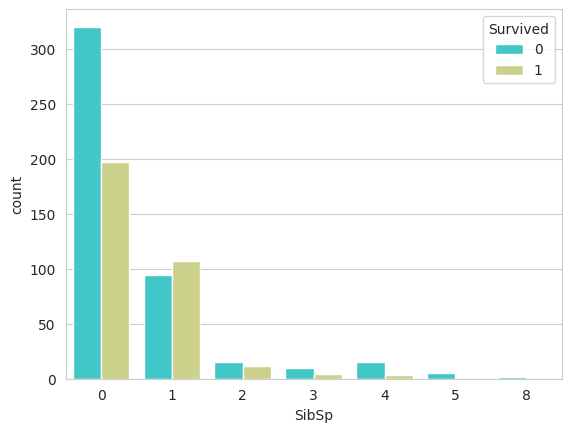

In [32]:
sns.set_style('whitegrid')
sns.countplot(x = 'SibSp', hue = 'Survived',data=df_train_data,palette = 'rainbow')
plt.show()

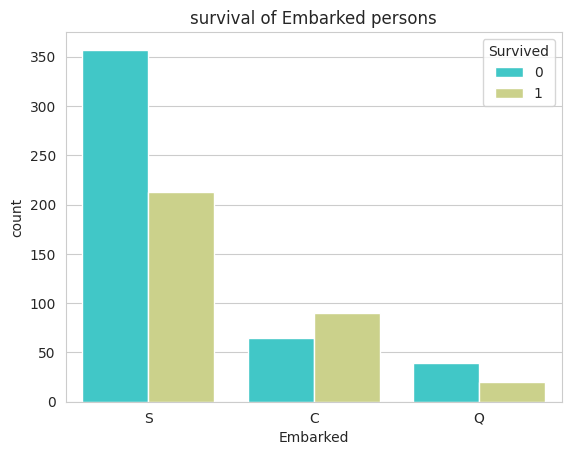

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue = 'Survived', data=df_train_data,palette = 'rainbow')
plt.title('survival of Embarked persons')
plt.show()

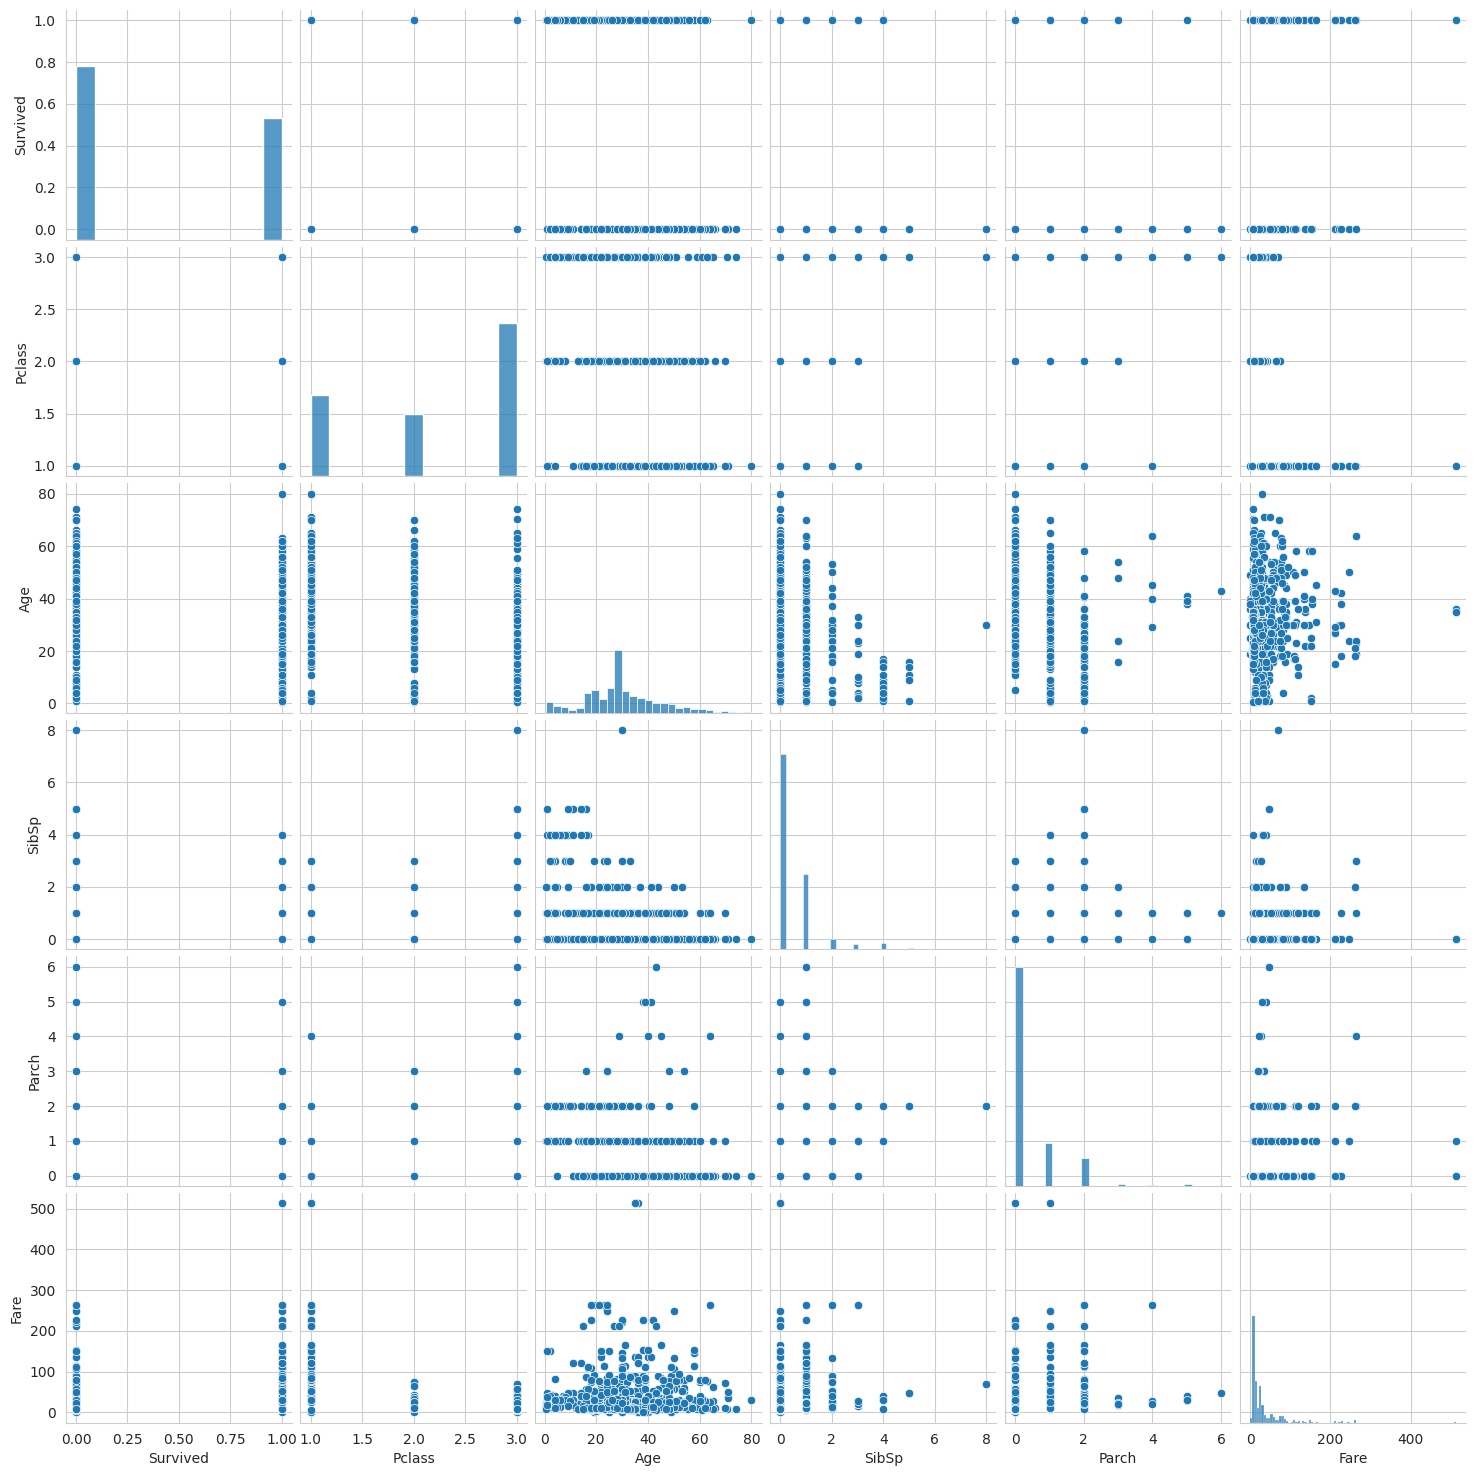

In [34]:
# pairplot of the train data set
sns.pairplot(df_train_data)
plt.show()

In [35]:
# Remove the outliers and replace with meadian
def remove_outliers_replace_with_median(df_train_data):
    for column in df_train_data.select_dtypes(include=[np.number]).columns:
        Q1 = df_train_data[column].quantile(0.25)
        Q3 = df_train_data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        median = df_train_data[column].median()
        df_train_data[column] = df_train_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_train_data
df_train_clean_data = remove_outliers_replace_with_median(df_train_data)
df_train_clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1.0,0.0,7.2500,B96 B98,S
1,1,1,female,38.000000,1.0,0.0,71.2833,C85,C
2,1,3,female,26.000000,0.0,0.0,7.9250,B96 B98,S
3,1,1,female,35.000000,1.0,0.0,53.1000,C123,S
4,0,3,male,35.000000,0.0,0.0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0.0,0.0,29.1250,B96 B98,Q
887,1,1,female,19.000000,0.0,0.0,30.0000,B42,S
888,0,3,female,29.869351,1.0,2.0,23.4500,B96 B98,S
889,1,1,male,26.000000,0.0,0.0,30.0000,C148,C


In [36]:
# LabelEncoding the data
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (list, not DataFrame)
object_cols = ['Sex','Cabin','Embarked']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in object_cols:
    df_train_clean_data[col] = le.fit_transform(df_train_clean_data[col].astype(str))  # Convert to string if needed

df_train_clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1.0,0.0,7.2500,47,2
1,1,1,0,38.000000,1.0,0.0,71.2833,81,0
2,1,3,0,26.000000,0.0,0.0,7.9250,47,2
3,1,1,0,35.000000,1.0,0.0,53.1000,55,2
4,0,3,1,35.000000,0.0,0.0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,0.0,0.0,29.1250,47,1
887,1,1,0,19.000000,0.0,0.0,30.0000,30,2
888,0,3,0,29.869351,1.0,2.0,23.4500,47,2
889,1,1,1,26.000000,0.0,0.0,30.0000,60,0


In [37]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]
numeric = df_train_clean_data[numeric_cols]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df_train_clean_data[numeric_cols] = scaler.fit_transform(df_train_clean_data[numeric_cols])

df_train_clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.0,1,0.375000,0.5,0.0,0.101707,47,2
1,1,0.0,0,0.660714,0.5,0.0,1.000000,81,0
2,1,1.0,0,0.446429,0.0,0.0,0.111176,47,2
3,1,0.0,0,0.607143,0.5,0.0,0.744915,55,2
4,0,1.0,1,0.607143,0.0,0.0,0.112930,47,2
...,...,...,...,...,...,...,...,...,...
885,0,1.0,0,0.678571,0.0,0.0,0.408581,47,1
887,1,0.0,0,0.321429,0.0,0.0,0.420856,30,2
888,0,1.0,0,0.515524,0.5,1.0,0.328969,47,2
889,1,0.0,1,0.446429,0.0,0.0,0.420856,60,0


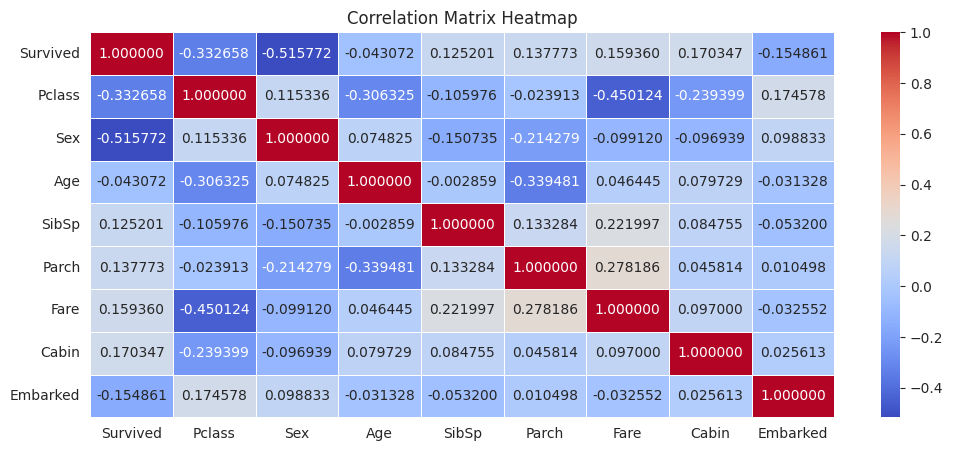

In [38]:
# heat map of the train data set

plt.figure(figsize = (12,5))
sns.heatmap(df_train_clean_data.corr(),annot = True, cmap = 'coolwarm',fmt = '2f',linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Building Predictive Models**

In [39]:
y = df_train_clean_data['Survived']
x = df_train_clean_data.iloc[:,1:]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 8)
(157, 8)
(627,)
(157,)


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    score = cross_val_score(model, x, y, cv=5)
    print('CV Score:', np.mean(score))

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7295918367346939
CV Score: 0.7270618977625347


In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7857142857142857
CV Score: 0.76281234688878


In [44]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8214285714285714
CV Score: 0.7793891883063857


In [45]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 239, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406463 -> initscore=-0.378608
[LightGBM] [Info] Start training from score -0.378608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# **Complete Model Training with Full Data**

In [46]:
y = df_train_clean_data['Survived']
x = df_train_clean_data.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
model = LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 241, number of negative: 347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.409864 -> initscore=-0.364528
[LightGBM] [Info] Start training from score -0.364528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [47]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [48]:
y_pred_series = pd.Series(y_pred)

# Now you can use value_counts()
y_pred_counts = y_pred_series.value_counts()

print(y_pred_counts)

0    119
1     77
Name: count, dtype: int64


In [49]:
#predictions
predictions=[round(value) for value in y_pred]

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print('LGBM Accuarcy:',accuracy)

LGBM Accuarcy: 0.7806122448979592


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have already trained your XGBoost model and have predictions (y_pred)
# and true labels (y_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"LGBM Accuracy: {accuracy}")
print(f"LGBM Precision: {precision}")
print(f"LGBM Recall: {recall}")

LGBM Accuracy: 0.7806122448979592
LGBM Precision: 0.7532467532467533
LGBM Recall: 0.7073170731707317


# **XGBOOST**

In [52]:
# fit model no training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
y_pred_xb = model.predict(x_test)
y_pred_xb

(525, 8) (525,) (259, 8) (259,)


array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [54]:
accuracy = accuracy_score(y_test, y_pred_xb)
print('XGBoost accuracy :', accuracy)

XGBoost accuracy : 0.7760617760617761


In [55]:
#accuracy, precision, recall xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_xb)
precision = precision_score(y_test, y_pred_xb)
recall = recall_score(y_test, y_pred_xb)

print(f"XGBoost Accuracy: {accuracy}")
print(f"XGBoost Precision: {precision}")
print(f"XGBoost Recall: {recall}")

XGBoost Accuracy: 0.7760617760617761
XGBoost Precision: 0.7340425531914894
XGBoost Recall: 0.6764705882352942


## **1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.**

Based on the performance metrics you provided for both LightGBM and XGBoost, here’s a comparison:

| **Metric**     | **XGBoost**              | **LightGBM**            | **Observation**                                                |
|----------------|--------------------------|-------------------------|----------------------------------------------------------------|
| **Accuracy**   | 0.8203                    | 0.8565                  | LightGBM has higher accuracy, indicating better overall performance. |
| **Precision**  | 0.7589                    | 0.8333                  | LightGBM has higher precision, meaning it has fewer false positives. |
| **Recall**     | 0.7658                    | 0.7738                  | LightGBM has slightly higher recall, meaning it correctly identifies more actual positives. |

### Key Observations:
- **LightGBM outperforms XGBoost** in all the metrics (accuracy, precision, and recall).
- LightGBM's **higher precision** indicates it is better at minimizing false positives, while its slightly higher recall indicates it's also catching more true positives compared to XGBoost.

LightGBM may be the better model in terms of overall performance.



---

##2.	**Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.**

To visualize the results, a bar chart can be used to compare the accuracy, precision, and recall of XGBoost and LightGBM. Each bar would represent a performance metric for both models side by side. The **strengths** of LightGBM would be highlighted by its **higher precision and accuracy**, showing that it is better at correctly predicting positives and reducing false positives. However, both models have similar recall, indicating they are equally capable of identifying true positives.

The **weakness** of XGBoost is its relatively **lower precision**, meaning it may produce more false positives, though its recall is still comparable to LightGBM. The visualization helps identify which areas (e.g., precision, recall) each model excels in or needs improvement, providing clear insights into their comparative performance.

